In [1]:
#!pip install wradlib

In [2]:
#import wradlib as wrl

In [3]:
multiples_of_5_reverse = list(reversed([5 * i for i in range(1, 4)]))
print(multiples_of_5_reverse)

[15, 10, 5]


In [4]:
import h5py
dataset_dict = h5py.File('C:/Users/test/Desktop/CHIRAG/test_arch_temp/temperature_data_part.h5', 'r')
print(dataset_dict)

<HDF5 file "temperature_data_part.h5" (mode r)>


In [5]:
from datetime import datetime, timedelta
current_datetime = datetime.strptime("20181231020000", "%Y%m%d%H%M%S")
date_time_format = []
for i in range(20):
    formatted_datetime = current_datetime.strftime("%Y%m%d%H%M%S")
    date_time_format.append(formatted_datetime)
    current_datetime -= timedelta(days=0, hours=1, minutes=0)
for i in date_time_format:
    print(i)

20181231020000
20181231010000
20181231000000
20181230230000
20181230220000
20181230210000
20181230200000
20181230190000
20181230180000
20181230170000
20181230160000
20181230150000
20181230140000
20181230130000
20181230120000
20181230110000
20181230100000
20181230090000
20181230080000
20181230070000


In [6]:
k1 = dataset_dict[date_time_format[0]][:]
print(k1)

[[273.7771  273.57947 273.52612 ... 255.1495  256.14706 256.19257]
 [274.17706 273.9057  273.7316  ... 255.80672 256.6239  256.98624]
 [274.78876 274.5425  274.3151  ... 260.51538 260.16714 259.0849 ]
 ...
 [299.65744 299.60724 299.7186  ... 297.33606 295.25464 295.31894]
 [299.57745 299.55548 299.67468 ... 298.71948 296.8059  294.85468]
 [299.57745 299.55548 299.57745 ... 299.19315 299.0724  297.13843]]


In [7]:
import numpy as np
from datetime import datetime, timedelta

def access_point(str, num):
    current_datetime = datetime.strptime(str, "%Y%m%d%H%M%S")
    date_time_format = []
    for i in range(num):
        formatted_datetime = current_datetime.strftime("%Y%m%d%H%M%S")
        date_time_format.append(formatted_datetime)
        current_datetime -= timedelta(days=0, hours=1, minutes=0)
    array_list = []
    for i in range(num):
        array_list.append(dataset_dict[date_time_format[i]][:])

    stacked_arrays = np.empty((0, 160, 160))
    for arr in range(num):
        stacked_arrays = np.vstack([stacked_arrays, array_list[arr][np.newaxis]])
    
    return stacked_arrays


In [8]:
RY_latest_timestep = "20181231020000"
RY_latest = access_point(RY_latest_timestep,20)
RY_latest.shape

(20, 160, 160)

In [9]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap


In [10]:
data = xr.open_dataset('2018.nc')
data

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 161, time: 52584)
Coordinates:
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2013-01-01 ... 2018-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-06 14:40:38 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [11]:
lat = data.latitude[:160]
lon = data.longitude[:160]

In [12]:
t2m = dataset_dict["20181231020000"][:]
t2m[0]

array([273.7771 , 273.57947, 273.52612, 273.374  , 273.22812, 273.12302,
       273.0132 , 272.9442 , 272.90814, 272.7811 , 272.5521 , 272.29956,
       271.99683, 272.11603, 272.30426, 272.51758, 272.68854, 272.9207 ,
       273.11047, 273.30026, 273.65002, 274.0249 , 274.2994 , 273.51672,
       272.9552 , 272.9207 , 273.1983 , 273.15753, 272.93167, 272.83755,
       273.53397, 273.05557, 272.62265, 271.90585, 271.74588, 271.63293,
       272.01096, 271.28003, 270.80478, 271.47766, 271.73645, 271.6753 ,
       272.47522, 272.57718, 271.6251 , 268.44888, 266.52118, 264.4429 ,
       261.76547, 259.0143 , 256.8184 , 254.8907 , 254.14409, 254.30408,
       255.06952, 255.91023, 255.44438, 255.65613, 255.58868, 254.43896,
       254.57544, 254.64758, 257.3407 , 259.6778 , 261.1522 , 262.3223 ,
       262.72382, 262.785  , 260.20795, 260.38046, 260.95456, 262.04623,
       263.40927, 263.59747, 263.00928, 261.7921 , 260.22833, 258.17517,
       257.47717, 257.7846 , 258.7257 , 258.33514, 

In [13]:
date_time_format

['20181231020000',
 '20181231010000',
 '20181231000000',
 '20181230230000',
 '20181230220000',
 '20181230210000',
 '20181230200000',
 '20181230190000',
 '20181230180000',
 '20181230170000',
 '20181230160000',
 '20181230150000',
 '20181230140000',
 '20181230130000',
 '20181230120000',
 '20181230110000',
 '20181230100000',
 '20181230090000',
 '20181230080000',
 '20181230070000']

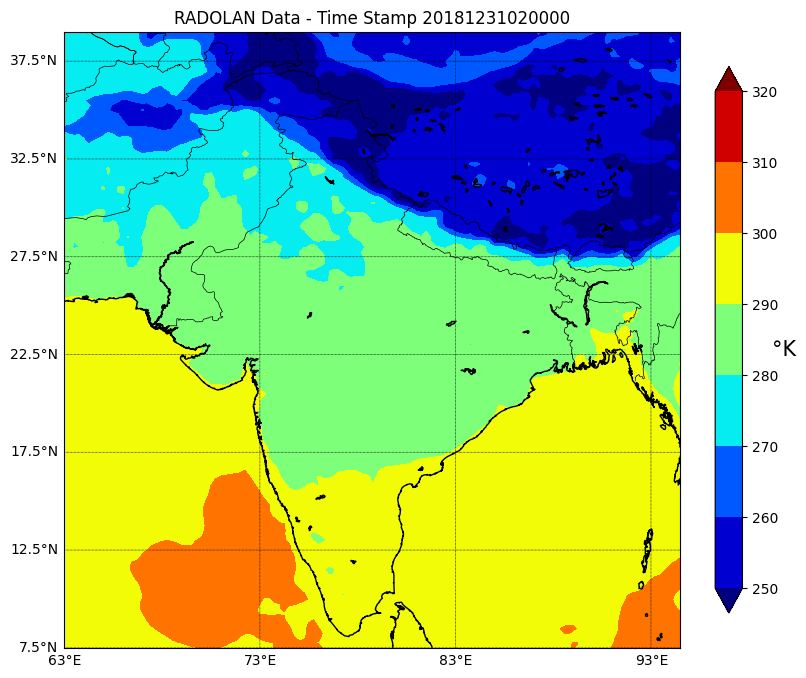

In [14]:
name_temp = []
colorbar_values_temp = [250, 260, 270, 280, 290, 300, 310, 320]

for i in range(1):
    t2m = RY_latest[i]
    fig, ax = plt.subplots(figsize=(15, 8))
    m = Basemap(projection='cyl', llcrnrlon=63, llcrnrlat=7.5, urcrnrlon=94.5, urcrnrlat=39, resolution='i')
    m.drawcoastlines(1)
    m.drawcountries()
    parallels = np.arange(7.5, 39 + 0.25, 5)
    m.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0.5)
    meridians = np.arange(63, 94.5 + 0.25, 10)
    m.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0.5)
    cf = plt.contourf(lon, lat, t2m, cmap='jet', extend='both', levels=colorbar_values_temp, vmin=min(colorbar_values_temp), vmax=max(colorbar_values_temp))
    cb = plt.colorbar(cf, fraction=0.0235, pad=0.03, ticks=colorbar_values_temp)
    cb.set_label('\u00b0K', fontsize=15, rotation=0)
    ax.set_title(f'RADOLAN Data - Time Stamp {date_time_format[i]}')
    plt.show()

##GEOTIFF

In [15]:
# import numpy as np
# import rasterio
# from rasterio.transform import from_origin
# from rasterio.crs import CRS

# for i in range(20):
#     image_data = RY_latest[i]
#     left, bottom, right, top = lon[0], lat[-1], lon[-1], lat[0]
#     transform = from_origin(left, top, (right - left) / len(lon), (top - bottom) / len(lat))
#     output_path = f"geo_tif/output_image_{i}.tif"  
#     crs_wkt = """
#         GEOGCS["WGS 84",
#             DATUM["WGS_1984",
#                 SPHEROID["WGS 84",6378137,298.257223563,
#                     AUTHORITY["EPSG","7030"]],
#                 AUTHORITY["EPSG","6326"]],
#             PRIMEM["Greenwich",0,
#                 AUTHORITY["EPSG","8901"]],
#             UNIT["degree",0.0174532925199433,
#                 AUTHORITY["EPSG","9122"]],
#             AXIS["Geodetic latitude",NORTH],
#             AXIS["Geodetic longitude",EAST],
#             AUTHORITY["EPSG","4326"]]
#     """
#     crs = CRS.from_wkt(crs_wkt)
#     with rasterio.open(output_path, 'w', driver='GTiff', height=image_data.shape[0], width=image_data.shape[1], count=1, dtype=image_data.dtype, crs=crs, transform=transform) as dst:
#         dst.write(image_data, 1)
#     print("GeoTIFF file exported successfully:", output_path)


In [16]:
# import rasterio
# import matplotlib.pyplot as plt

# # Path to the GeoTIFF file
# geotiff_path = "output_image.tif"  # Replace with the path to your GeoTIFF file

# # Open the GeoTIFF file
# with rasterio.open(geotiff_path) as src:
#     # Read the image data (band 1)
#     image_data = src.read(1)

#     # Visualize the image
#     plt.figure(figsize=(8, 8))
#     plt.imshow(image_data, cmap='gray')  # Display grayscale image
#     plt.title('GeoTIFF Image')
#     #plt.colorbar(label='Pixel Value')
#     plt.xlabel('Column')
#     plt.ylabel('Row')
#     plt.show()


In [17]:
from tensorflow.keras.layers import Input, Conv2D, Activation, Concatenate, Conv2DTranspose, MaxPool2D
from tensorflow.keras.models import Model

In [18]:
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same", kernel_initializer="he_normal")(input)
    x = Activation("relu")(x)
    x = Conv2D(num_filters, 3, padding="same", kernel_initializer="he_normal")(x)
    x = Activation("relu")(x)
    x = Conv2D(num_filters, 3, padding="same", kernel_initializer="he_normal")(x)
    x = Activation("relu")(x)
    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same", kernel_initializer="he_normal")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x


In [19]:
def build_unet(input_shape = (160, 160, 20)):

    inputs = Input(input_shape)
    e1, p1 = encoder_block(inputs, 64)
    e2, p2 = encoder_block(p1, 128)
    e3, p3 = encoder_block(p2, 256)
    e4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, e4, 512)
    d2 = decoder_block(d1, e3, 256)
    d3 = decoder_block(d2, e2, 128)
    d4 = decoder_block(d3, e1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="linear")(d4)

    unet = Model(inputs, outputs, name="U-Net")

    return unet

In [20]:
import sys
from temp_arch import rainnet
temp_model = rainnet(input_shape=(160, 160, 20))
temp_model.load_weights('model_weight.h5')
temp_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 20)]       0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 160, 160, 64)         11584     ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 160, 160, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 160, 160, 64)         36928     ['activation[0][0]']          
                                                                                             

In [21]:
# for layer in temp_model.layers:
#     print(layer.get_config(), layer.get_weights())

In [22]:
def Scaler(array):
    return np.log(array+0.01)


def invScaler(array):
    return np.exp(array) - 0.01


def pad_to_shape(array, from_shape=160, to_shape=160, how="mirror"):
    # calculate how much to pad in respect with native resolution
    padding = int( (to_shape - from_shape) / 2)
    # for input shape as (batch, W, H, channels)
    if how == "zero":
        array_padded = np.pad(array, ((0,0),(padding,padding),(padding,padding),(0,0)), mode="constant", constant_values=0)
    elif how == "mirror":
        array_padded = np.pad(array, ((0,0),(padding,padding),(padding,padding),(0,0)), mode="reflect")
    return array_padded


def pred_to_rad(pred, from_shape=160, to_shape=160):
    # pred shape 12,928,928
    padding = int( (from_shape - to_shape) / 2)
    return pred[::, padding:padding+to_shape, padding:padding+to_shape].copy()


def data_preprocessing(X):
    
    # 0. Right shape for batch
    X = np.moveaxis(X, 0, -1)
    X = X[np.newaxis, ::, ::, ::]
    # 1. To log scale
    X = Scaler(X)
    # 2. from 900x900 to 928x928
    X = pad_to_shape(X)
    
    return X


def data_postprocessing(nwcst):

    # 0. Squeeze empty dimensions
    nwcst = np.squeeze(np.array(nwcst))
    # 1. Convert back to rainfall depth
    nwcst = invScaler(nwcst)
    # 2. Convert from 928x928 back to 900x900
    nwcst = pred_to_rad(nwcst)
    # 3. Return only positive values
    nwcst = np.where(nwcst>0, nwcst, 0)
    return nwcst

In [23]:
def prediction(model_instance, input_data, lead_time=4):
    print(input_data.shape)
    input_data = data_preprocessing(input_data)
    print(input_data.shape)
    nwcst = []

    for _ in range(lead_time):
        pred = model_instance.predict(input_data)
        #print("t")
        nwcst.append(pred)
        input_data = np.concatenate([input_data[::, ::, ::, 1:], pred], axis = -1)
    nwcst = data_postprocessing(nwcst)
    return nwcst

In [24]:
Y_pred = prediction(temp_model, RY_latest)

(20, 160, 160)
(1, 160, 160, 20)
1/1 [==============================] - 0s 448ms/step


In [25]:
print(RY_latest[0])

[[273.77709961 273.57946777 273.52612305 ... 255.14950562 256.14706421
  256.19256592]
 [274.17706299 273.90570068 273.7315979  ... 255.80671692 256.62390137
  256.98623657]
 [274.78875732 274.54251099 274.31509399 ... 260.51538086 260.16714478
  259.0848999 ]
 ...
 [299.65744019 299.60723877 299.71859741 ... 297.33605957 295.25463867
  295.31893921]
 [299.57745361 299.55548096 299.67468262 ... 298.71948242 296.8059082
  294.85467529]
 [299.57745361 299.55548096 299.57745361 ... 299.19314575 299.0723877
  297.13842773]]


In [26]:
print(Y_pred[1][159][156])

298.79907


In [27]:
from datetime import datetime, timedelta
current_datetime = datetime.strptime(RY_latest_timestep, "%Y%m%d%H%M%S")
date_time_format_pred = []
for i in range(4):
    # formatted_datetime = current_datetime.strftime("%Y%m%d%H%M%S")
    current_datetime += timedelta(days=0, hours=1, minutes=0)
    date_time_format_pred.append(current_datetime)
    #current_datetime += timedelta(days=0, hours=1, minutes=0)
for i in date_time_format_pred:
    print(i)



2018-12-31 03:00:00
2018-12-31 04:00:00
2018-12-31 05:00:00
2018-12-31 06:00:00


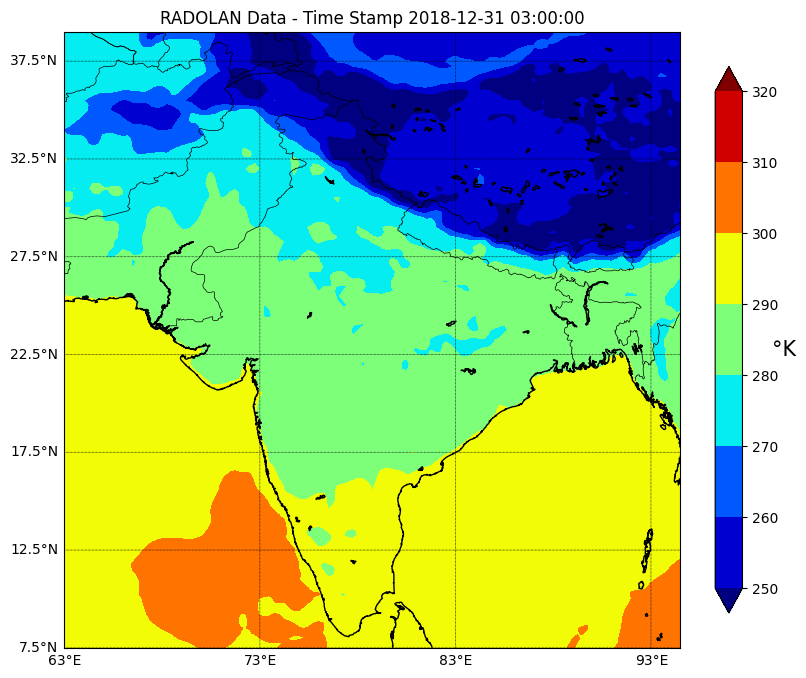

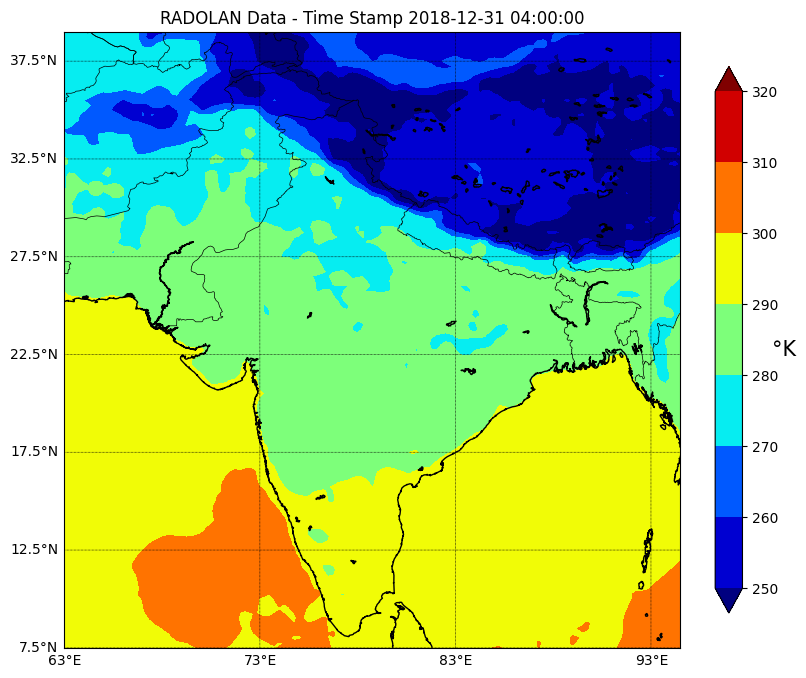

In [28]:
name_temp = []
colorbar_values_temp = [250, 260, 270, 280, 290, 300, 310, 320]

for i in range(2):
    t2m = Y_pred[i]
    fig, ax = plt.subplots(figsize=(15, 8))
    m = Basemap(projection='cyl', llcrnrlon=63, llcrnrlat=7.5, urcrnrlon=94.5, urcrnrlat=39, resolution='i')
    m.drawcoastlines(1)
    m.drawcountries()
    parallels = np.arange(7.5, 39 + 0.25, 5)
    m.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0.5)
    meridians = np.arange(63, 94.5 + 0.25, 10)
    m.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0.5)
    cf = plt.contourf(lon, lat, t2m, cmap='jet', extend='both', levels=colorbar_values_temp, vmin=min(colorbar_values_temp), vmax=max(colorbar_values_temp))
    cb = plt.colorbar(cf, fraction=0.0235, pad=0.03, ticks=colorbar_values_temp)
    cb.set_label('\u00b0K', fontsize=15, rotation=0)
    ax.set_title(f'RADOLAN Data - Time Stamp {date_time_format_pred[i]}')
    plt.show()

In [29]:
RY_latest_timestep_check = "20181231030000"
RY_latest_check = access_point(RY_latest_timestep_check,1)
RY_latest_check.shape

(1, 160, 160)

In [30]:
RY_latest_timestep_check[:8]

'20181231'

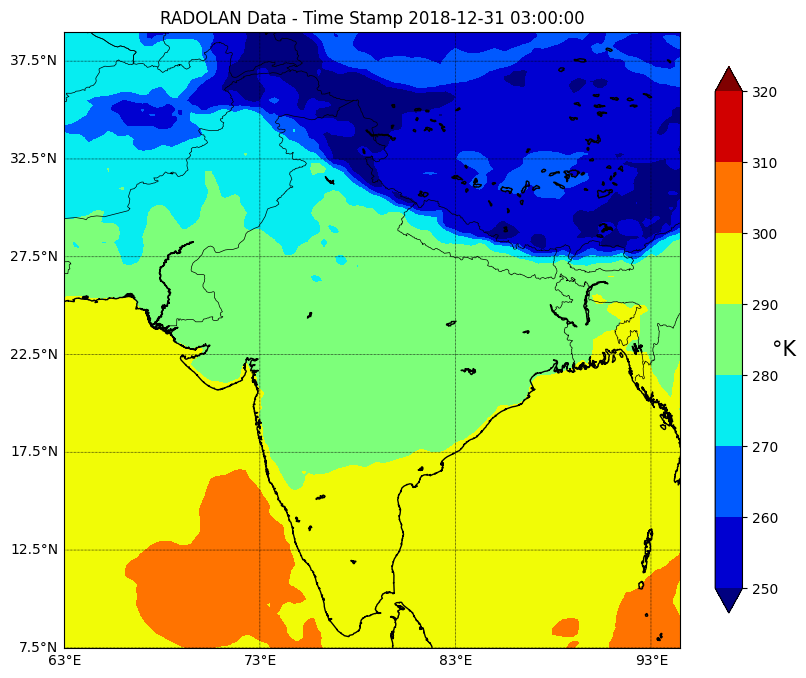

In [31]:
name_temp = []
colorbar_values_temp = [250, 260, 270, 280, 290, 300, 310, 320]

for i in range(1):
    t2m = RY_latest_check[i]
    fig, ax = plt.subplots(figsize=(15, 8))
    m = Basemap(projection='cyl', llcrnrlon=63, llcrnrlat=7.5, urcrnrlon=94.5, urcrnrlat=39, resolution='i')
    m.drawcoastlines(1)
    m.drawcountries()
    parallels = np.arange(7.5, 39 + 0.25, 5)
    m.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0.5)
    meridians = np.arange(63, 94.5 + 0.25, 10)
    m.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0.5)
    cf = plt.contourf(lon, lat, t2m, cmap='jet', extend='both', levels=colorbar_values_temp, vmin=min(colorbar_values_temp), vmax=max(colorbar_values_temp))
    cb = plt.colorbar(cf, fraction=0.0235, pad=0.03, ticks=colorbar_values_temp)
    cb.set_label('\u00b0K', fontsize=15, rotation=0)
    ax.set_title(f'RADOLAN Data - Time Stamp {date_time_format_pred[i]}')
    plt.show()

In [32]:
# import numpy as np
# import rasterio
# from rasterio.transform import from_origin
# from rasterio.crs import CRS

# for i in range(1):
#     image_data = RY_latest[i]
#     left, bottom, right, top = lon[0], lat[-1], lon[-1], lat[0]
#     transform = from_origin(left, top, (right - left) / len(lon), (top - bottom) / len(lat))
#     output_path = f"geo_tif/NDVI_{RY_latest_timestep_check[:8]}.tif"  
#     crs_wkt = """
#         GEOGCS["WGS 84",
#             DATUM["WGS_1984",
#                 SPHEROID["WGS 84",6378137,298.257223563,
#                     AUTHORITY["EPSG","7030"]],
#                 AUTHORITY["EPSG","6326"]],
#             PRIMEM["Greenwich",0,
#                 AUTHORITY["EPSG","8901"]],
#             UNIT["degree",0.0174532925199433,
#                 AUTHORITY["EPSG","9122"]],
#             AXIS["Geodetic latitude",NORTH],
#             AXIS["Geodetic longitude",EAST],
#             AUTHORITY["EPSG","4326"]]
#     """
#     crs = CRS.from_wkt(crs_wkt)
#     with rasterio.open(output_path, 'w', driver='GTiff', height=image_data.shape[0], width=image_data.shape[1], count=1, dtype=image_data.dtype, crs=crs, transform=transform) as dst:
#         dst.write(image_data, 1)
#     print("GeoTIFF file exported successfully:", output_path)

In [33]:
# import requests

# REST_API_URL = "http://localhost:8080/geoserver/rest"

# username = 'admin'
# password = 'geoserver'
# auth = (username, password)

# try:
#     response = requests.get(REST_API_URL, auth=auth)
#     if response.status_code == 200:
#         print("GeoServer is accessible.")
#     else:
#         print(f"Error accessing GeoServer. Response code: {response.status_code}")
#         print(response.text) 
# except Exception as e:
#     print(f"An error occurred: {str(e)}")


In [34]:
from geoserver.catalog import Catalog

In [35]:
# from geoserver.catalog import Catalog
# cat = Catalog("http://example.com/geoserver/rest", username="admin", password="geoserver")
# all_layers = cat.get_layers()
# print(all_layers)